<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-Fetching" data-toc-modified-id="Data-Fetching-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Fetching</a></span></li><li><span><a href="#Data-Scrubbing" data-toc-modified-id="Data-Scrubbing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Scrubbing</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data selection</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Dimensionality" data-toc-modified-id="Dimensionality-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Dimensionality</a></span></li><li><span><a href="#Normalizing" data-toc-modified-id="Normalizing-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Normalizing</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model testing</a></span><ul class="toc-item"><li><span><a href="#Model-import" data-toc-modified-id="Model-import-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Model import</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Performance</a></span><ul class="toc-item"><li><span><a href="#Predicted-/-real-digit-trade-off" data-toc-modified-id="Predicted-/-real-digit-trade-off-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Predicted / real digit trade-off</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [35]:
import os

# visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# keras
from keras.models import load_model

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Fetching

In [51]:
test_csv_path = os.path.join('../data/test/raw/test.csv')

In [52]:
df_test = pd.read_csv(test_csv_path)

# Data Scrubbing

In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_test.shape

(28000, 784)

# Data cleaning

## Missing values

In [6]:
df_test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

## Duplicates

In [9]:
df_test.duplicated().value_counts()

False    28000
dtype: int64

# Data selection

In [59]:
X_test = df_test

# Preprocessing

## Dimensionality

In [54]:
# add 3d dimension for image plot
X_test = np.expand_dims(X_test, axis=+2)

In [55]:
# reshape images (28x28) for model instantiation
X_test = X_test.reshape(-1, 28,28, 1)

## Normalizing

In [60]:
# normalizing pixels to convert into digit image
X_test = X_test/255.0

------------------------------------

# Processed data export

In [61]:
# export processed data for modeling
X_test.to_csv('../data/test/processed/test_norm.csv')

-----------------------------

# Model testing

## Model import

In [24]:
# import model
model = load_model('../models/model_v1.h5')

## Performance

### Predicted / real digit trade-off

In [48]:
# predict values
y_pred = model.predict(X_test)

In [28]:
y_pred = np.argmax(y_pred, axis=1)

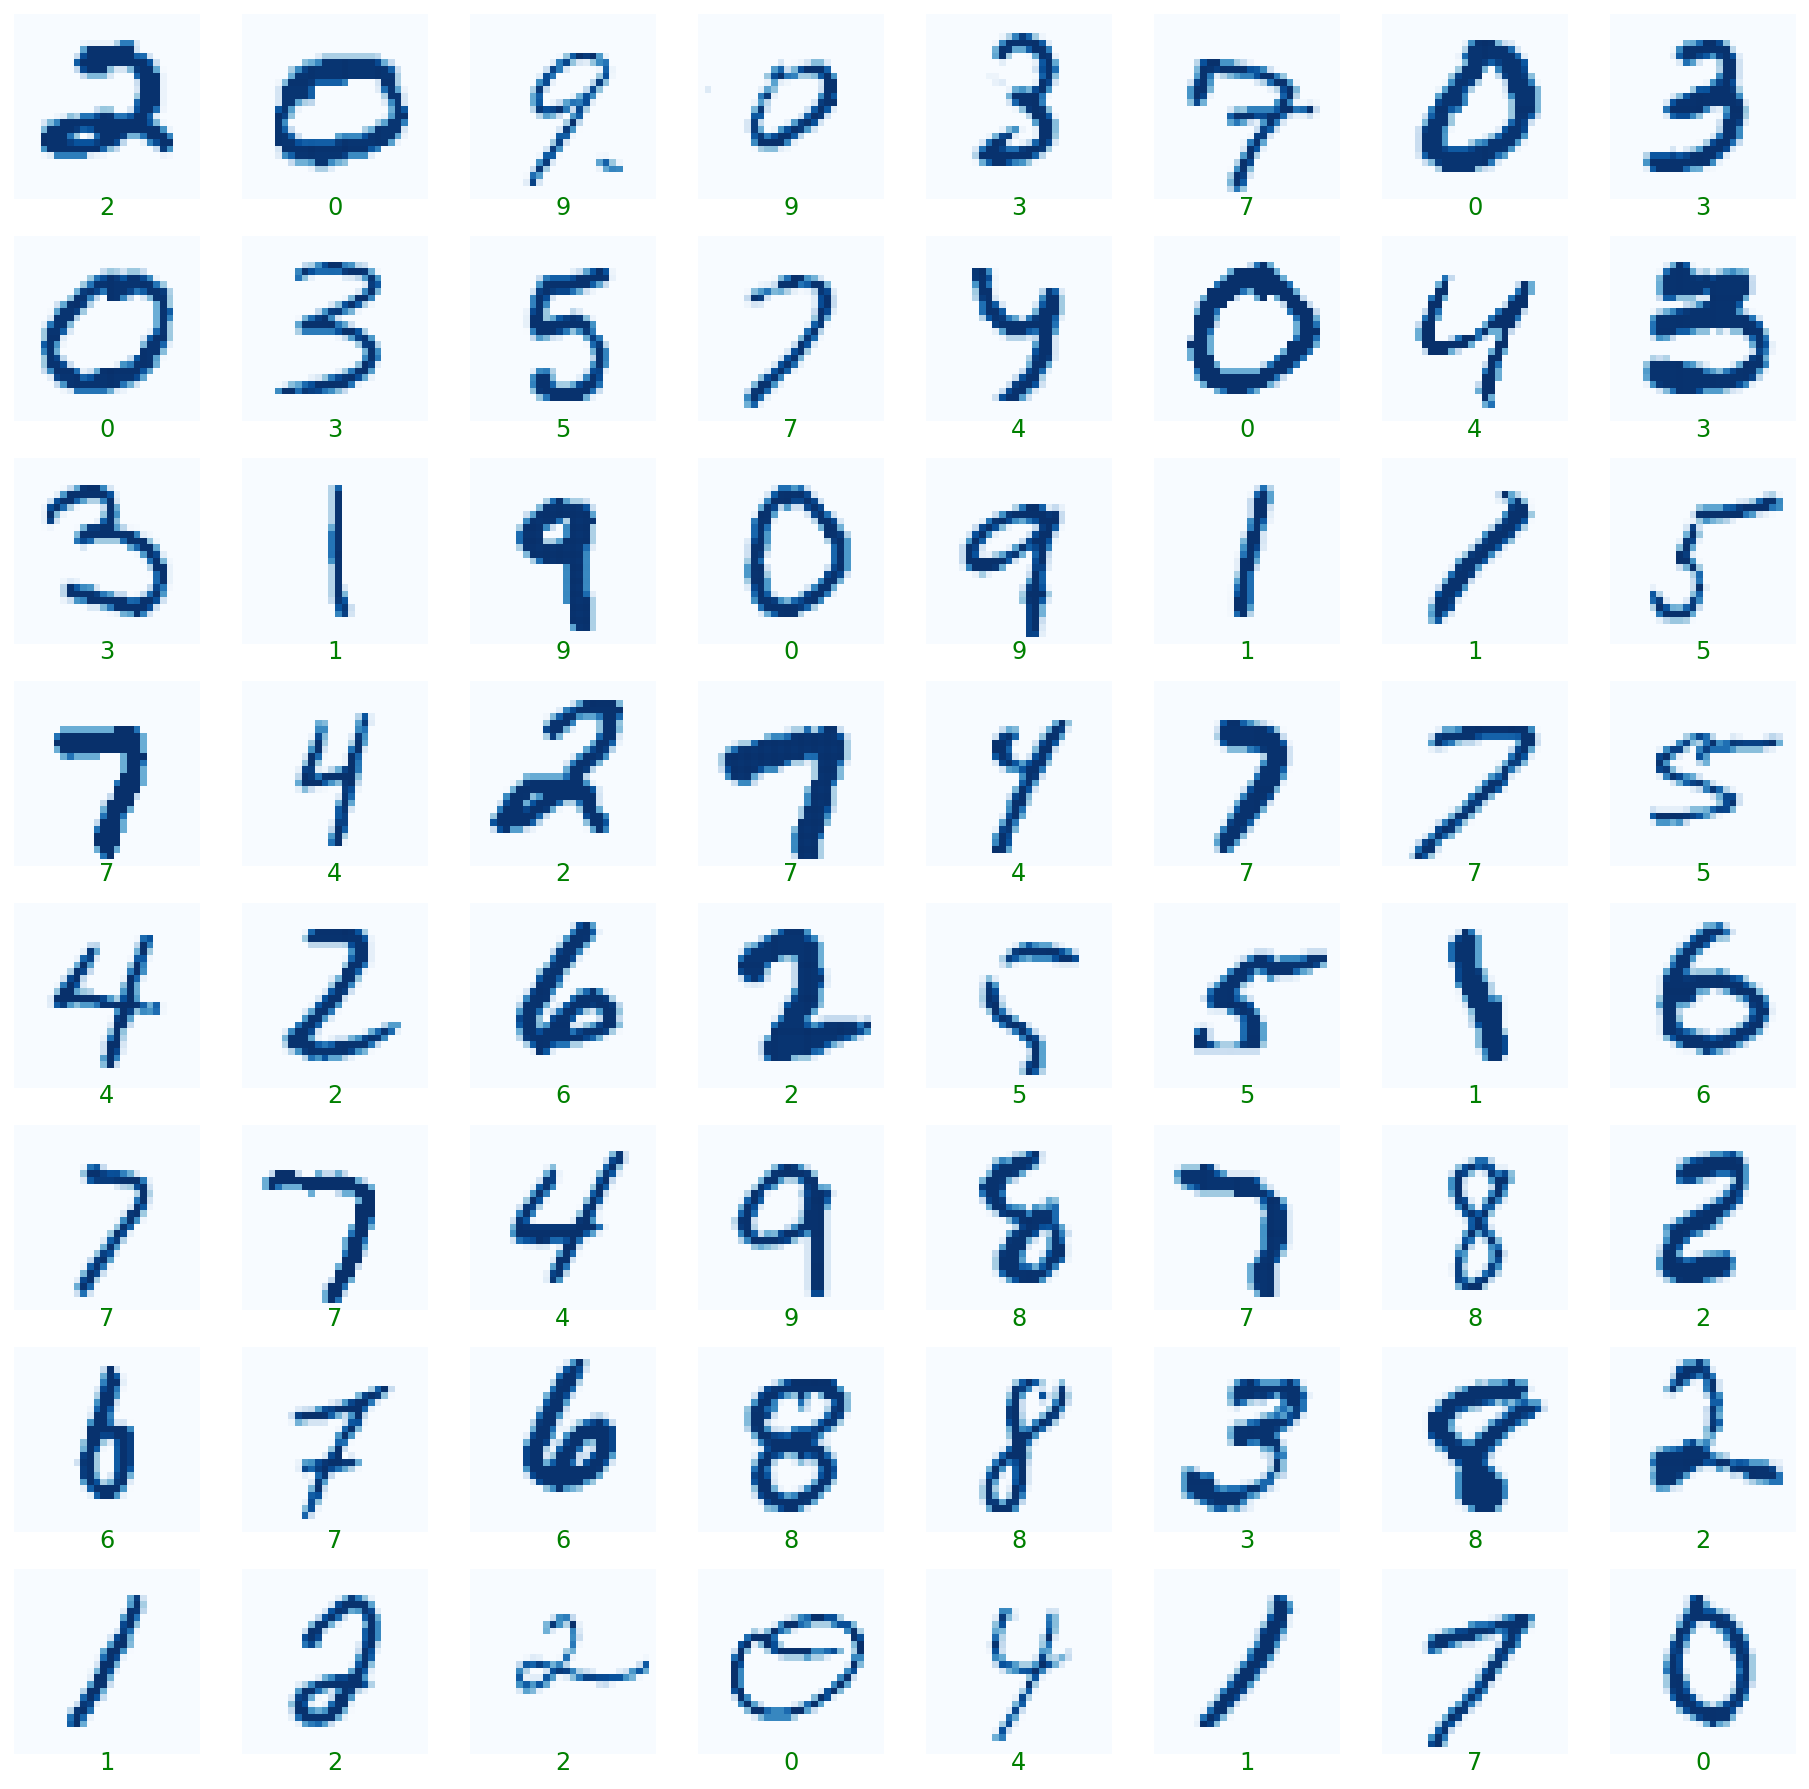

In [34]:
rows = 8 # defining no. of rows
cols = 8 # defining no. of columns

f = plt.figure(figsize=(2*cols, 2*rows)) # defining a figure

for i in range(rows*cols):
    f.add_subplot(rows, cols, i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_test[i].reshape([28,28]), cmap="Blues")
    plt.axis("off")
    plt.title(str(y_pred[i]), y=-0.15, color="green")
plt.savefig('../reports/model_test/figures/pred-real_compare_plot')

-------------------------------